[nltk_data] Downloading package punkt to
[nltk_data]     /Users/christopherbiekeu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/christopherbiekeu/nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/christopherbiekeu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Training Time: 4.8164 seconds
Accuracy: 0.9695

Classification Report:
               precision    recall  f1-score   support

     business       0.97      0.94      0.95       108
entertainment       0.96      0.97      0.97        74
     politics       0.96      0.97      0.97        80
        sport       0.99      1.00      0.99        91
         tech       0.96      0.97      0.97        73

     accuracy                           0.97       426
    macro avg       0.97      0.97      0.97       426
 weighted avg       0.97      0.97      0.97       426



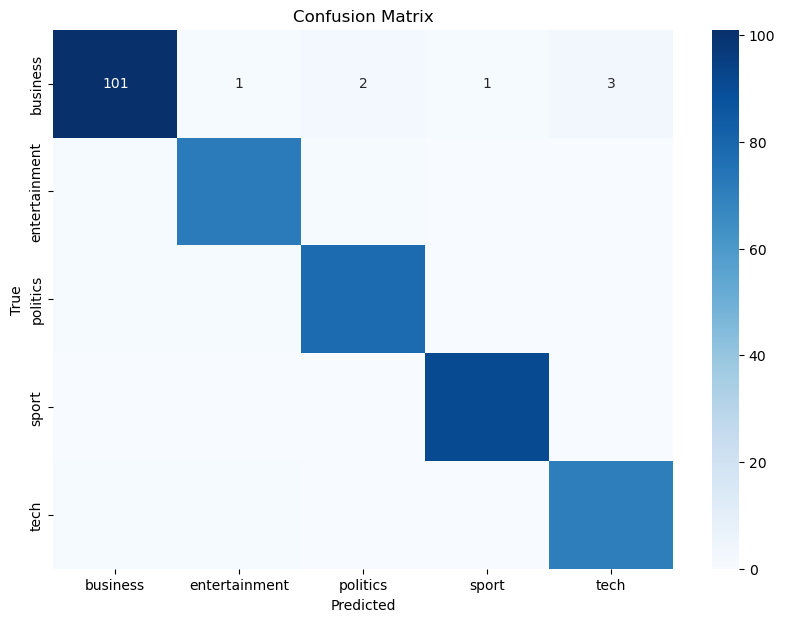

In [2]:
import pandas as pd
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import time
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK data if necessary
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Load data
data = pd.read_csv('bbc_data.csv')

# Remove duplicates
data.drop_duplicates(keep='first', inplace=True)

# Data Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    # Tokenize and lemmatize, remove stopwords and non-alphabetic tokens
    words = text.split()
    cleaned_text = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(cleaned_text)

data['data'] = data['data'].apply(preprocess_text)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)  # Limit features for efficiency
X = tfidf.fit_transform(data['data']).toarray()

# Label Encoding
le = LabelEncoder()
y = le.fit_transform(data['labels'])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM Model
svm_model = SVC(kernel='linear', random_state=42)

# Measure training time
start_time = time.time()
svm_model.fit(X_train, y_train)
training_time = time.time() - start_time

# Make Predictions
y_pred = svm_model.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Training Time: {training_time:.4f} seconds")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
